In [1]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline


In [2]:
stats_file_name = '/home/rzavalet/stats/ac_aup_350.csv'

In [3]:
stats = pd.read_csv(stats_file_name)

In [4]:
stats['sample'] = range(stats['count'].size)
stats['sample'] = stats['sample'] + 1

In [5]:
stats.describe()

,count,duration,slack,delay,tpm,ttpm,update_xacts,update_duration,average_service_delay_ms,degree_timing_violation,smoth_degree_timing_violation,p_ext,sys_queue_size,user_queue_size,sample
count,2.100000e+01,2.100000e+01,21.000000,2.100000e+01,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000,21.0,21.000000,21.000000,21.000000
mean,6.250803e+05,2.840914e+07,81.904762,2.840906e+07,115321.380952,90453.571429,27237.714286,1.651089e+06,66.638095,0.739524,0.726190,1.0,0.380952,244.809524,11.000000
std,3.826647e+05,1.905723e+07,8.728716,1.905723e+07,28802.368357,22174.887654,18390.124769,1.218299e+06,116.272739,2.878914,1.294448,0.0,1.532194,139.091559,6.204837
min,4.800000e+01,2.746000e+04,80.000000,2.742000e+04,48.000000,1.000000,0.000000,0.000000e+00,3.910000,0.000000,0.140000,1.0,0.000000,0.000000,1.000000
25%,3.182200e+05,1.269244e+07,80.000000,1.269236e+07,122338.000000,93574.000000,12100.000000,6.020350e+05,41.940000,0.050000,0.160000,1.0,0.000000,117.000000,6.000000
50%,6.240110e+05,2.837540e+07,80.000000,2.837532e+07,123048.000000,94530.000000,27100.000000,1.561699e+06,45.850000,0.150000,0.180000,1.0,0.000000,349.000000,11.000000
75%,9.330540e+05,4.379209e+07,80.000000,4.379201e+07,123615.000000,96426.000000,42100.000000,2.622208e+06,47.070000,0.180000,0.410000,1.0,0.000000,349.000000,16.000000
max,1.241447e+06,5.934926e+07,120.000000,5.934918e+07,134332.000000,120645.000000,57100.000000,3.762482e+06,572.080000,13.300000,5.320000,1.0,7.000000,349.000000,21.000000


In [6]:
plot_style='o-'

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

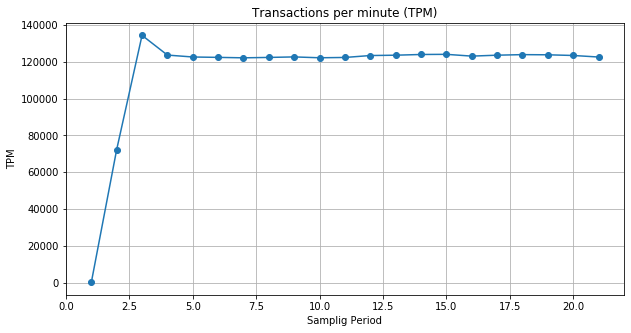

In [7]:
pp.figure(figsize=(10, 5))
#stats['tpm'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['tpm'], kind='line', style=plot_style,figsize=(10, 5), grid=True, legend=False)
pp.title('Transactions per minute (TPM)')
pp.ylabel('TPM')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

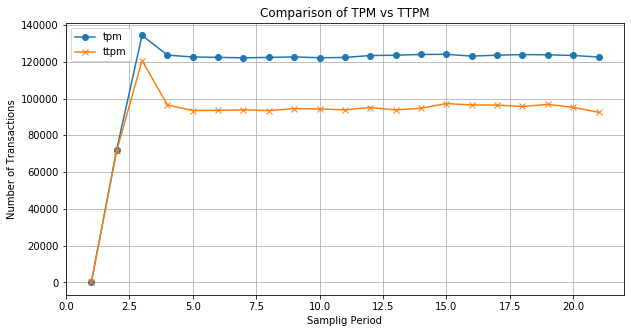

In [8]:
stats.plot('sample',  ['tpm','ttpm'], kind='line', style=['o-','x-'], figsize=(10, 5), grid=True,)
pp.title('Comparison of TPM vs TTPM')
pp.ylabel('Number of Transactions')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

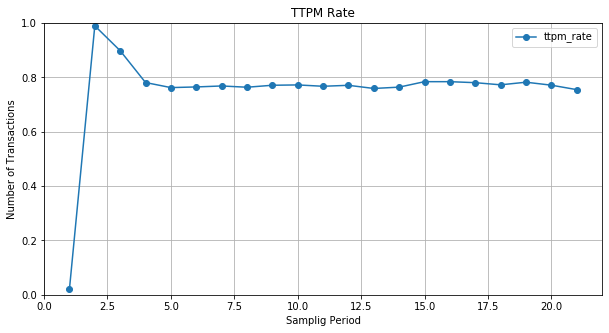

In [9]:
stats['ttpm_rate'] = stats['ttpm']/stats['tpm']
stats.plot('sample',  ['ttpm_rate'], kind='line', style=['o-','x-'], figsize=(10, 5), ylim=(0,1), grid=True,)
pp.title('TTPM Rate')
pp.ylabel('Number of Transactions')
pp.xlabel('Samplig Period')

In [10]:
stats['ttpm_rate'].describe()

count    21.000000
mean      0.751539
std       0.176074
min       0.020833
25%       0.764015
50%       0.770943
75%       0.780973
max       0.989605
Name: ttpm_rate, dtype: float64

In [11]:
stats['avg_response_time'] = stats['duration']/stats['count']

In [12]:
stats['avg_response_time'].describe()

count     21.000000
mean      66.637137
std      116.273815
min        3.905153
25%       41.937936
50%       45.848664
75%       47.066835
max      572.083333
Name: avg_response_time, dtype: float64

<Figure size 720x360 with 0 Axes>

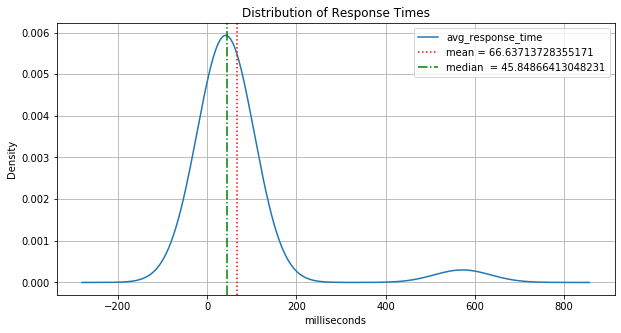

In [13]:
pp.figure(figsize=(10, 5))
#myplot=stats['avg_response_time'].plot.density(bw_method=0.3)
myplot=stats.plot('sample', ['avg_response_time'], kind='density',figsize=(10, 5), grid=True, legend=False)
myplot.set_title('Distribution of Response Times')
myplot.set_xlabel('milliseconds')

mean_label = 'mean = ' + str(stats['avg_response_time'].mean())
median_label = 'median  = ' + str(stats['avg_response_time'].median())
myplot.axvline(x=stats['avg_response_time'].mean(), linestyle=':', label= mean_label, color='r')
myplot.axvline(x=stats['avg_response_time'].median(), linestyle='-.', label=median_label, color='g')
pp.legend()

Text(0, 0.5, 'milliseconds')

<Figure size 720x360 with 0 Axes>

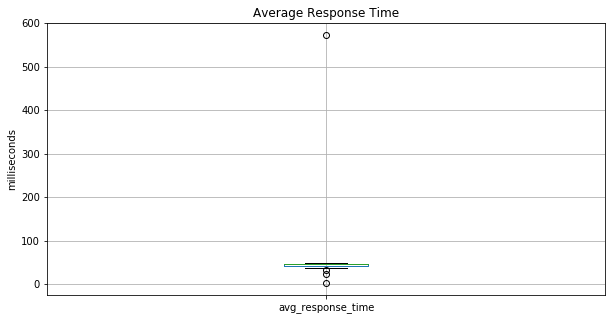

In [14]:
pp.figure(figsize=(10, 5))
#boxplot = stats['avg_response_time'].plot(kind='box',ylim=(9500,9750),figsize=(10, 5))
myplot=stats.plot('sample', ['avg_response_time'], kind='box',figsize=(10, 5), grid=True,)
pp.title('Average Response Time')
pp.ylabel('milliseconds')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

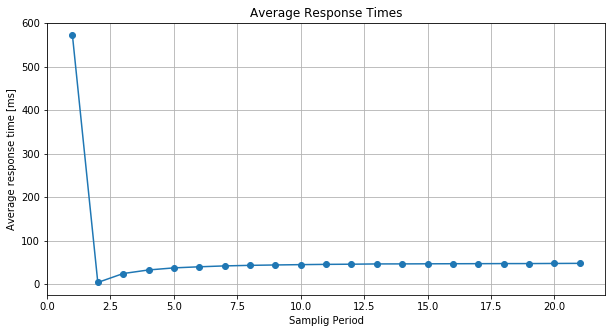

In [15]:
pp.figure(figsize=(10, 5))
#myplot=stats['avg_response_time'].plot(kind='line', style=plot_style, ylim=(0,15000))
myplot=stats.plot('sample', ['avg_response_time'], kind='line', legend=False, style=plot_style,figsize=(10, 5), grid=True)
pp.title('Average Response Times')
pp.ylabel('Average response time [ms]')
pp.xlabel('Samplig Period')

In [16]:
stats['average_service_delay_ms'].describe()

count     21.000000
mean      66.638095
std      116.272739
min        3.910000
25%       41.940000
50%       45.850000
75%       47.070000
max      572.080000
Name: average_service_delay_ms, dtype: float64

<Figure size 720x360 with 0 Axes>

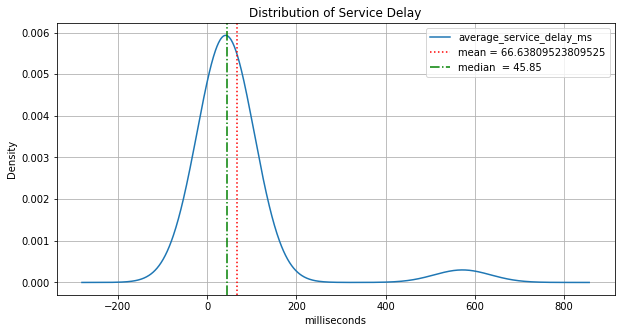

In [17]:
pp.figure(figsize=(10, 5))
myplot=stats.plot('sample', ['average_service_delay_ms'], kind='density',figsize=(10, 5), grid=True)
#myplot=stats['average_service_delay_ms'].plot.density(bw_method=0.3)
myplot.set_title('Distribution of Service Delay')
myplot.set_xlabel('milliseconds')
mean_label = 'mean = ' + str(stats['average_service_delay_ms'].mean())
median_label = 'median  = ' + str(stats['average_service_delay_ms'].median())
myplot.axvline(x=stats['average_service_delay_ms'].mean(), linestyle=':', label= mean_label, color='r')
myplot.axvline(x=stats['average_service_delay_ms'].median(), linestyle='-.', label=median_label, color='g')
pp.legend()

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

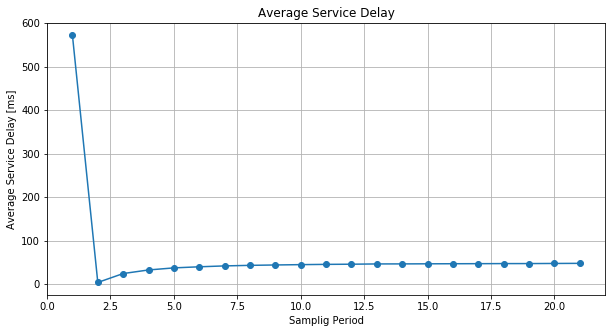

In [18]:
pp.figure(figsize=(10, 5))
#myplot=stats['average_service_delay_ms'].plot(kind='line', style=plot_style, ylim=(0,15000))
myplot=stats.plot('sample', ['average_service_delay_ms'], kind='line', style=plot_style, figsize=(10, 5), grid=True, legend=False)
pp.title('Average Service Delay')
pp.ylabel('Average Service Delay [ms]')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

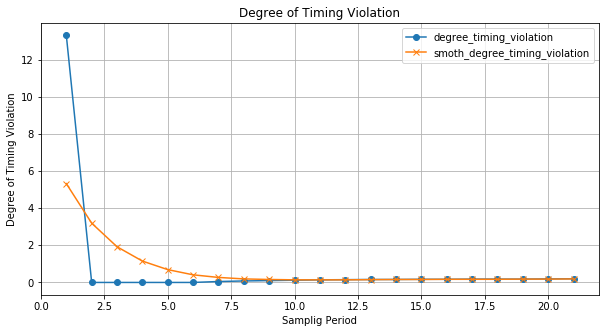

In [19]:
pp.figure(figsize=(10, 5))
#myplot=stats['degree_timing_violation'].plot(kind='line', style=plot_style)
#stats['smoth_degree_timing_violation'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['degree_timing_violation','smoth_degree_timing_violation'], kind='line', style=['o-','x-'],figsize=(10, 5), grid=True)
pp.title('Degree of Timing Violation')
pp.ylabel('Degree of Timing Violation')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

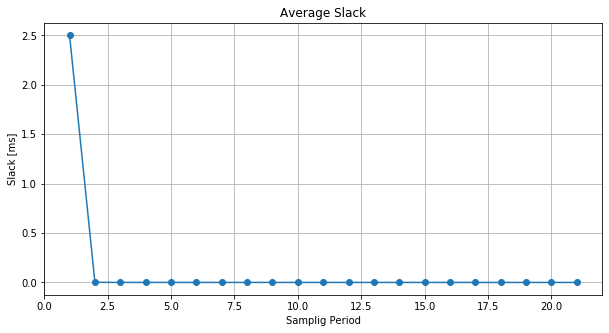

In [20]:
pp.figure(figsize=(10, 5))
stats['slack_duration'] = stats['slack'] / stats['count']
#myplot=stats['slack_duration'].plot(kind='line', style=plot_style, ylim=(0,200))
myplot=stats.plot('sample', ['slack_duration'], kind='line', style=plot_style, figsize=(10, 5), grid=True, legend=False)
pp.title('Average Slack')
pp.ylabel('Slack [ms]')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

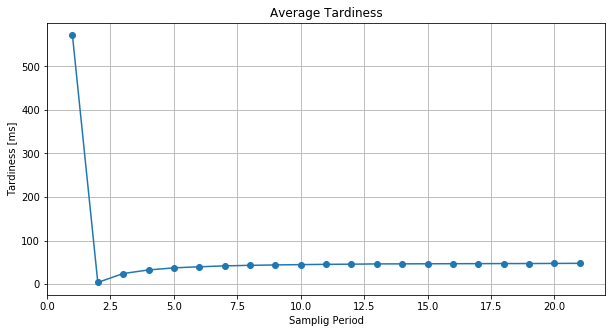

In [21]:

stats['delay_duration'] = stats['delay'] / stats['count']
#myplot=stats['delay_duration'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['delay_duration'], kind='line', style=plot_style, figsize=(10, 5), grid=True, legend=False)
pp.title('Average Tardiness')
pp.ylabel('Tardiness [ms]')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

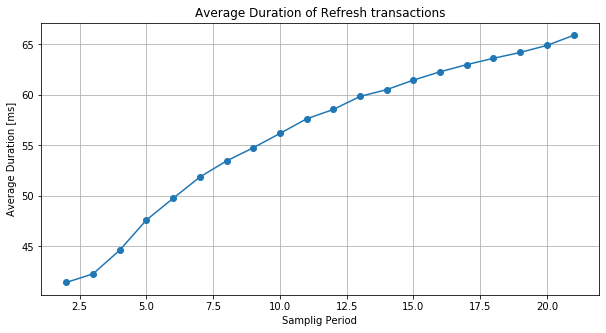

In [22]:
pp.figure(figsize=(10, 5))
stats['avg_update_duration'] = stats['update_duration']/stats['update_xacts']
#myplot=stats['avg_update_duration'].plot(kind='line', style=plot_style, ylim=(0,1000))
myplot=stats.plot('sample', ['avg_update_duration'], kind='line', style=plot_style, figsize=(10, 5), grid=True,legend=False)
pp.title('Average Duration of Refresh transactions')
pp.ylabel('Average Duration [ms]')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

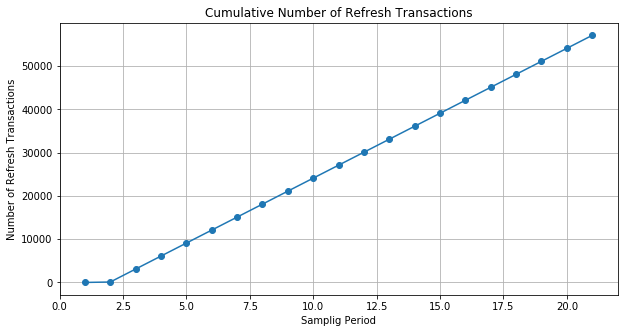

In [23]:
pp.figure(figsize=(10, 5))
#myplot=stats['update_xacts'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['update_xacts'], kind='line', style=plot_style,figsize=(10, 5), grid=True,legend=False)
pp.title('Cumulative Number of Refresh Transactions')
pp.ylabel('Number of Refresh Transactions')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

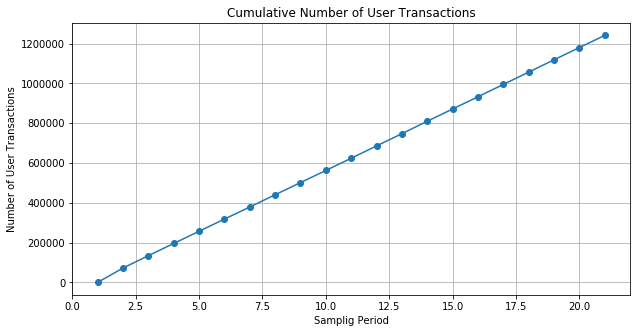

In [24]:
pp.figure(figsize=(10, 5))
#myplot=stats['count'].plot(kind='line', style=plot_style)
myplot=stats.plot('sample', ['count'], kind='line', style=plot_style,figsize=(10, 5), grid=True,legend=False)
pp.title('Cumulative Number of User Transactions')
pp.ylabel('Number of User Transactions')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

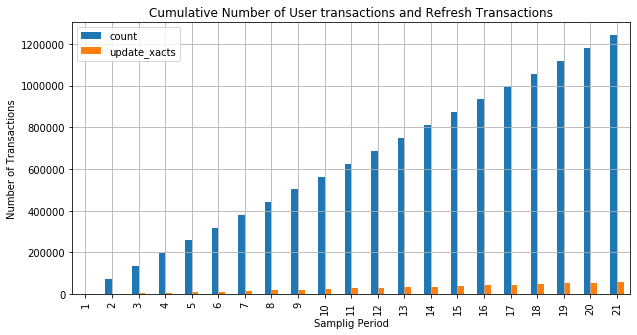

In [25]:
pp.figure(figsize=(10, 5))
stats.plot('sample',  ['count','update_xacts'], kind='bar', figsize=(10, 5), grid=True,)
pp.title('Cumulative Number of User transactions and Refresh Transactions')
pp.ylabel('Number of Transactions')
pp.xlabel('Samplig Period')

In [26]:
stats['delta_update_xacts'] = stats['update_xacts'].diff()
stats['delta_user_xacts'] = stats['count'].diff()

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

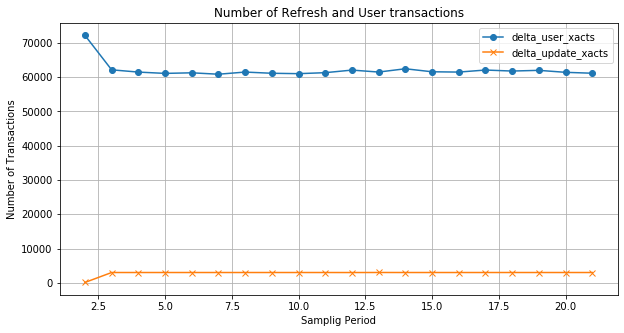

In [27]:
pp.figure(figsize=(10, 5))
stats.plot('sample',  ['delta_user_xacts','delta_update_xacts'], kind='line',style=['o-','x-'], figsize=(10, 5),grid=True,)
pp.title('Number of Refresh and User transactions')
pp.ylabel('Number of Transactions')
pp.xlabel('Samplig Period')

Text(0.5, 0, 'samplig period')

<Figure size 720x360 with 0 Axes>

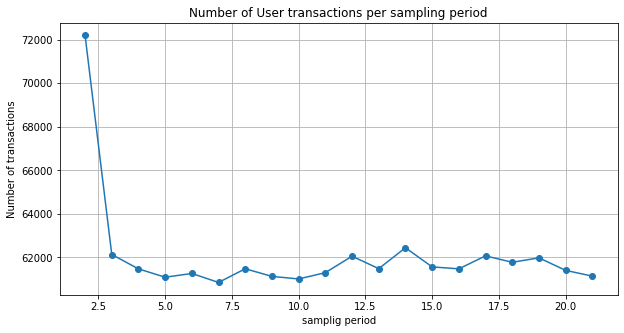

In [28]:
pp.figure(figsize=(10, 5))
stats.plot('sample',  ['delta_user_xacts'], kind='line',style=plot_style, figsize=(10, 5),grid=True,legend=False)
pp.title('Number of User transactions per sampling period')
pp.ylabel('Number of transactions')
pp.xlabel('samplig period')

Text(0.5, 0, 'Samplig Period')

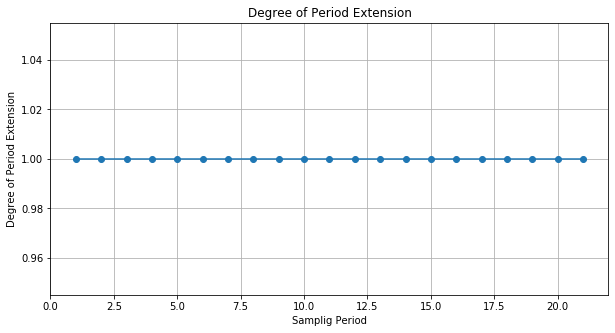

In [29]:
stats.plot('sample',  ['p_ext'], kind='line',style=plot_style, figsize=(10, 5),grid=True,legend=False)
pp.title('Degree of Period Extension')
pp.ylabel('Degree of Period Extension')
pp.xlabel('Samplig Period')

In [30]:
stats2 = pd.DataFrame({'tpm': stats['tpm'], 
                        'ttpm': stats['ttpm'],
                       'avg_response_time': stats['avg_response_time'],
                       'p_ext':stats['p_ext'], 
                       'smoth_degree_timing_violation': stats['smoth_degree_timing_violation']})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0e58e0a50>],
      dtype=object)

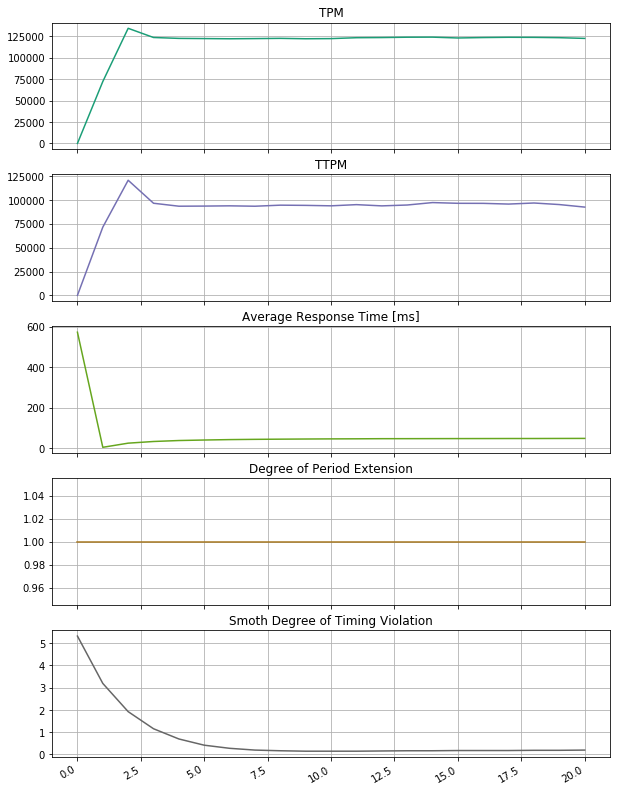

In [31]:
stats2.plot(kind = 'line',
            subplots=True, 
            layout = (5,1),

            figsize=(10, 15), 
            legend=False,
            title = ['TPM',
                     'TTPM',
                     'Average Response Time [ms]',
                     'Degree of Period Extension',
                     'Smoth Degree of Timing Violation'],
             grid=True,
           colormap='Dark2')

Text(0.5, 0, 'Samplig Period')

<Figure size 720x360 with 0 Axes>

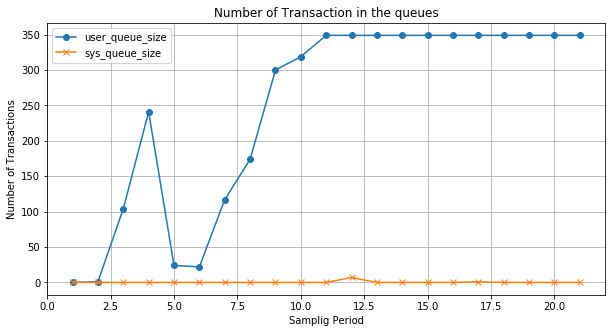

In [32]:
pp.figure(figsize=(10, 5))
stats.plot('sample',  ['user_queue_size','sys_queue_size'], kind='line',style=['o-','x-'], figsize=(10, 5),grid=True,)
pp.title('Number of Transaction in the queues')
pp.ylabel('Number of Transactions')
pp.xlabel('Samplig Period')